# Supervised Machine Learning

## importing dependancies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the dataset

In [2]:
df = pd.read_csv("hw04_data.csv", names = ['Exam1','Exam3','Admitted'])

In [3]:
df.head()

,Exam1,Exam3,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df.tail()

,Exam1,Exam3,Admitted
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


In [5]:
df.shape

(100, 3)

In [6]:
df.describe()

,Exam1,Exam3,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Exam1     100 non-null    float64
 1   Exam3     100 non-null    float64
 2   Admitted  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [8]:
df.dtypes

Exam1       float64
Exam3       float64
Admitted      int64
dtype: object

In [9]:
df.isna().sum()

Exam1       0
Exam3       0
Admitted    0
dtype: int64

In [10]:
df.duplicated().sum()

0

<AxesSubplot:>

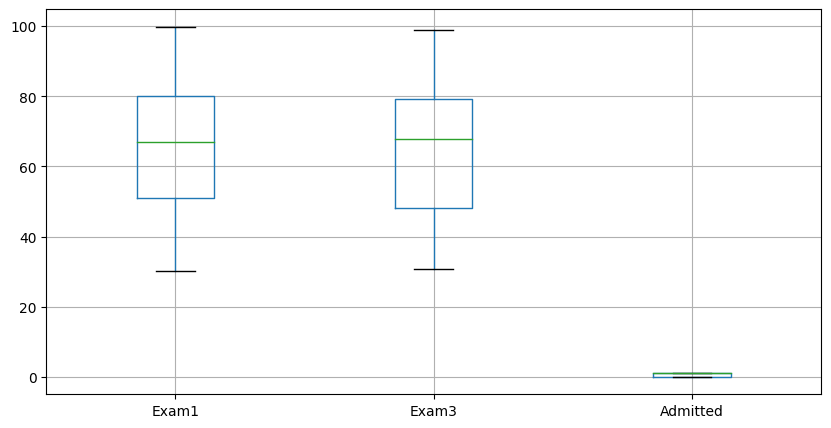

In [11]:
df.boxplot(figsize=(10,5))

In [12]:
df["Admitted"] = df["Admitted"].astype('category')

In [13]:
df.dtypes

Exam1        float64
Exam3        float64
Admitted    category
dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder
lib = LabelEncoder()

In [15]:
df["Admitted"] = lib.fit_transform(df['Admitted'])

In [16]:
# X = df.drop("Admitted",axis=1)
# y = df["Admitted"]

In [17]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [18]:
sns.set_style("darkgrid")

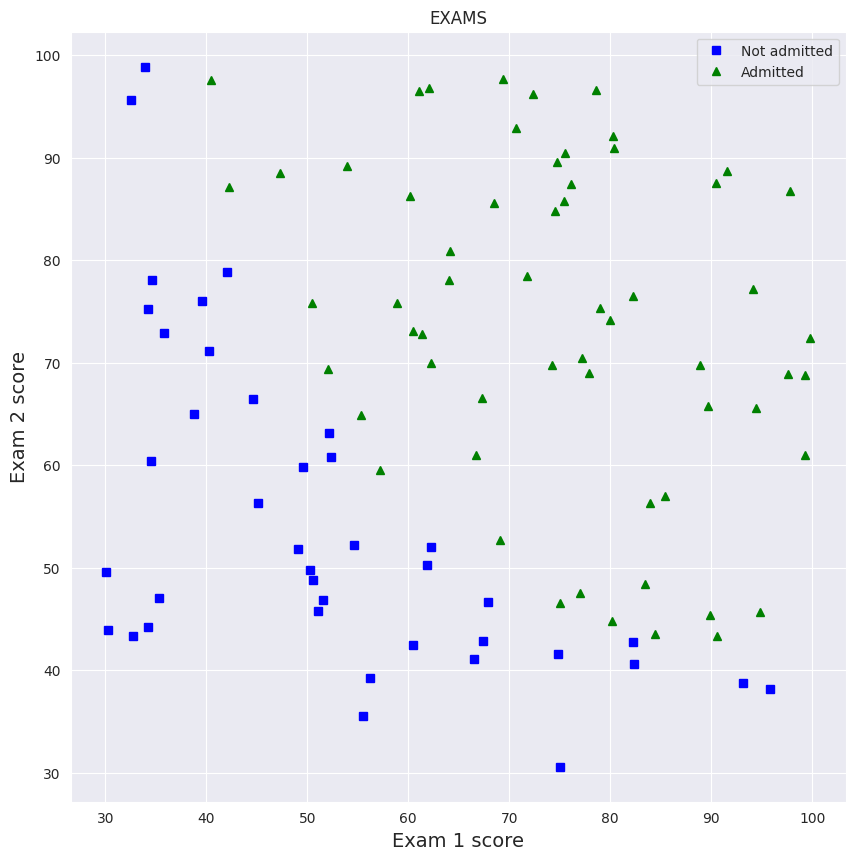

In [19]:
plt.figure(figsize=(10, 10))
# Plot the data for the “Not admitted” entries
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label = "Not admitted")
# Plot the data for the “Admitted” entries with the style of green triangles.
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label = "Admitted")
# You need to complete the code here
plt.legend(loc="best")
# Add labels for the coordinates
plt.title("EXAMS")
plt.xlabel("Exam 1 score", fontsize=14)
plt.ylabel("Exam 2 score",fontsize=14)
# You need to complete the code here
plt.show()

In [20]:
df.Admitted.values

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [23]:
logReg = LogisticRegression(class_weight="balanced")

In [24]:
logReg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [25]:
predictions = logReg.predict(X_test)

In [26]:
from sklearn import metrics

In [27]:
# evaluate the model
y_pred = logReg.predict(X_test)

from sklearn.metrics import *

# Accuracy
print("Accuracy: \n", accuracy_score(y_test, y_pred))

# confusion matrix
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))

# roc curve
print("\nROC Curve: \n", plot_roc_curve(logReg, X_test, y_test))

# roc_auc_score
print("\nROC AUC Score: \n", roc_auc_score(y_test, y_pred))

# classification report
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy: 
 0.8

Confusion Matrix: 
 [[7 1]
 [3 9]]

ROC Curve: 

ROC AUC Score: 
 0.8125

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



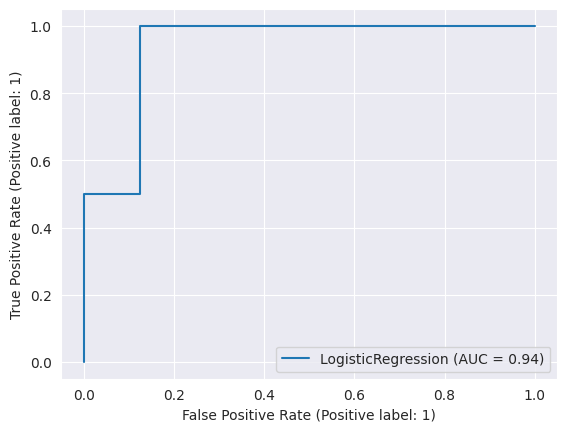

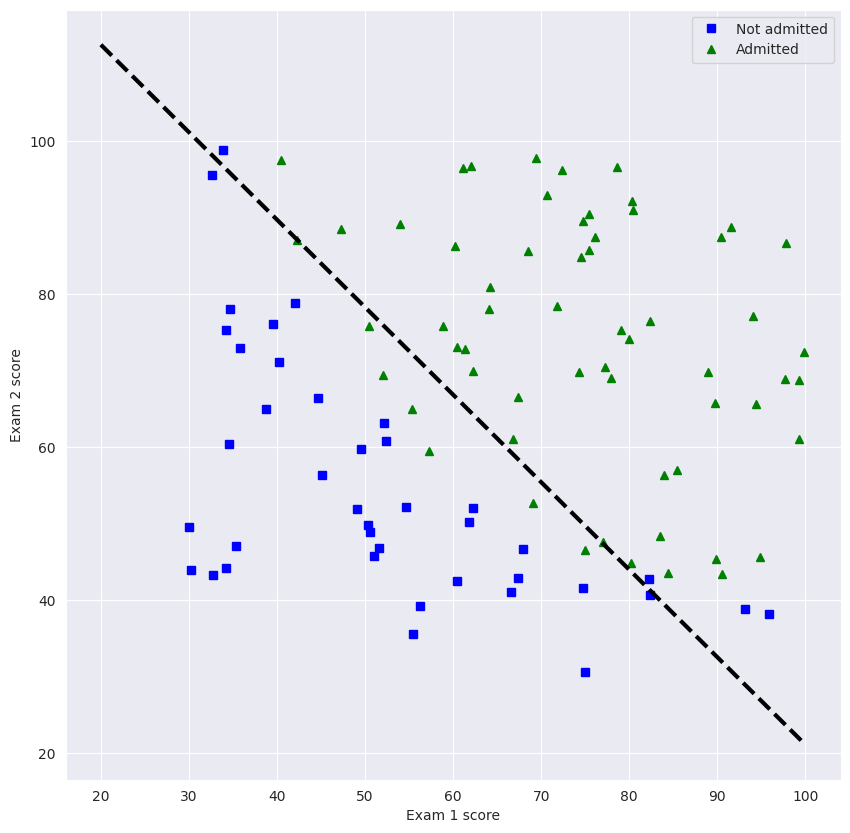

In [28]:
plt.figure(figsize=(10, 10))
# Plot the data for the “Not admitted” entries
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label = "Not admitted")
# Plot the data for the “Admitted” entries with the style of green triangles.
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label = "Admitted")
# You need to complete the code here
plt.legend(loc="best")
# Add labels for the coordinates
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
# You need to complete the code here
# visualizing the decision boundary
left_right = np.array([20, 100])
# If you save your model to a variable other than “log_reg”, you need to update the following command accordingly.
boundary = -(logReg.coef_[0][0] * left_right + logReg.intercept_[0]) / logReg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.show()

In [29]:
logReg.predict([[45,78]])

array([0])

In [30]:
logReg.predict([[56,80]])

array([1])

In [31]:
logReg.predict_proba([[45,78]])

array([[0.78943972, 0.21056028]])

In [33]:
logReg.predict_proba([[78,60]])

array([[0.04603208, 0.95396792]])